In [2]:
%reload_ext autoreload

%autoreload 2


In [3]:
input_file = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/20220607_153923_MP-LFC-MS1var-OT-S1-120kMS1_Report.tsv"
directlfq_results_fragion = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/20220607_153923_MP-LFC-MS1var-OT-S1-120kMS1_Report.tsv.protein_intensities.tsv"
directlfq_results_precursor = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/20220607_153923_MP-LFC-MS1var-OT-S1-120kMS1_Report.tsv.spectronaut_precursor.protein_intensities.tsv"

protein_mapping_file = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/organism_map.tsv"
samplemap  = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/samplemap.tsv"

ion_comparison_figure = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/ion_comparison_figure.pdf"

run_directlfq = False

In [4]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="spectronaut_fragion_isotopes")
    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="spectronaut_precursor")




In [5]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils


samples_used = lfqutils.get_samples_used_from_samplemap_file(samplemap, cond1="S1", cond2="S2")





restable_directlfq_fragion = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_results_fragion, input_name="directLFQ, fragments and MS1", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_directlfq_precursor = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_results_precursor, input_name="directLFQ, precursor", samples_c1=samples_used[0], samples_c2=samples_used[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:

In [6]:
organism_annotator_spectronaut_based = lfqbenchmark.OrganismAnnotatorSpectronaut(mapping_file=protein_mapping_file,protein_column="PG.ProteinGroups", organism_column="PG.Organisms")
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_directlfq_fragion)
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_directlfq_precursor)



In [7]:
import seaborn as sns
import directlfq.visualizations as lfq_viz

class MultiOrganismMultiMethodBoxPlotAdapted(lfq_viz.MultiOrganismMultiMethodBoxPlot):
    def plot_boxplot(self):
        color_palette = sns.color_palette(self._color_scheme.colorlist_hex, n_colors=len(self._fcs_to_expect))
        sns.violinplot(data=self._method_ratio_results_table, x="method", y = "log2fc", hue= "organism", palette=color_palette, hue_order=self._organisms_to_plot, ax=self.ax, linewidth=0.8)


/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:52: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:52: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide 

Saccharomyces cerevisiae (strain ATCC 204508 / S288c) num:1413 median_FC:1.0 STD:0.43

Homo sapiens num:3591 median_FC:0.018 STD:0.15

Caenorhabditis elegans num:2067 median_FC:-0.34 STD:0.19

Saccharomyces cerevisiae (strain ATCC 204508 / S288c) num:1412 median_FC:0.99 STD:0.21

Homo sapiens num:3591 median_FC:0.029 STD:0.14

Caenorhabditis elegans num:2067 median_FC:-0.31 STD:0.15



/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_53050/3653405397.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(ion_comparison_figure, layout="tight", bbox_inches="tight", dpi=300)
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_53050/3653405397.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(ion_comparison_figure.replace(".pdf", ".png"), layout="tight", bbox_inches="tight", dpi=300)


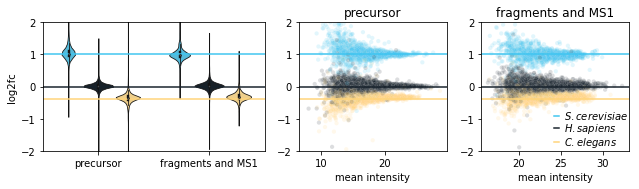

In [8]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.benchmarking as lfq_benchmark




methodname2resultsdf = {'precursor' : restable_directlfq_precursor.formated_dataframe, 'fragments and MS1' : restable_directlfq_fragion.formated_dataframe}

a4_dims = (11.7, 8.27)
a4_width_no_margin = 10.5
fig, axes = plt.subplots(1, 3,figsize=(a4_width_no_margin,2.363 ), gridspec_kw={'width_ratios' : [1.5, 1, 1]})

organisms_to_plot = [ "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Homo sapiens", "Caenorhabditis elegans"]
fcs_to_expect = [  np.log2(2), 0, -np.log2(1.3)]

merged_table = lfq_benchmark.ResultsTableMerger(method_name2results_df=methodname2resultsdf).merged_table


MultiOrganismMultiMethodBoxPlotAdapted(method_ratio_results_table=merged_table, ax = axes[0], organisms_to_plot=organisms_to_plot,fcs_to_expect= fcs_to_expect)



fcplotter_precursor = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_directlfq_precursor, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="precursor")
fcplotter_fragions = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios=restable_directlfq_fragion, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="fragments and MS1")




for ax in axes:
    ax.get_legend().remove()

for ax in axes[1:]:
    ax.set_ylabel("")

for ax in axes:
    ax.set_xlabel("mean intensity")
axes[0].set_xlabel("")
axes[0].set_ylim([-2, 2])
# axes[0].set_ylim([15, 33])
axes[1].set_ylim([-2, 2])
axes[2].set_ylim([-2, 2])

lines = axes[1].get_lines()
#axes[1].legend(lines, ["S. cerevisiae", "H. sapiens", "C. elegans"], loc='upper left', bbox_to_anchor=(1, 1))
fig.legend(lines, ["$S. cerevisiae$", "$H. sapiens$", "$C. elegans$"], bbox_to_anchor=[0.85, 0.25], 
           loc='center', ncol=1, title = None, frameon = False, labelspacing = 0, handlelength = 0.5, handletextpad = 0.5)
#change label type in legend



#fig.tight_layout()

fig.savefig(ion_comparison_figure, layout="tight", bbox_inches="tight", dpi=300)
fig.savefig(ion_comparison_figure.replace(".pdf", ".png"), layout="tight", bbox_inches="tight", dpi=300)
